**Phân tích giải pháp hiện tại:**

- Crossover rate = 0.8

- Mutation rate = 0.02

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas

In [2]:
POPULATION_SIZE = 200  # Kích thước quần thể
GENERATIONS = 200  # Số thế hệ

In [3]:
items = []  # Vật phẩm chứa weights và values
max_capacity = 0  # Maximum capacity
fitness_history = []  # Danh sách lưu trữ giá trị fitness của các cá thể tốt nhất qua từng thế hệ.

In [4]:
def get_user_input():
    global items, max_capacity, CROSSOVER_RATE, MUTATION_RATE

    # Nhập danh sách vật phẩm và sức chứa
    weights_str = input("Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): ")
    values_str = input("Nhập danh sách giá trị (phân tách bằng dấu phẩy): ")
    max_capacity = int(input("Nhập sức chứa tối đa: "))

    # Nhập tỷ lệ lai ghép và đột biến
    CROSSOVER_RATE = float(input("Nhập tỷ lệ lai ghép (giá trị từ 0 đến 1): "))
    MUTATION_RATE = float(input("Nhập tỷ lệ đột biến (giá trị từ 0 đến 1): "))

    # Chuyển đổi đầu vào thành danh sách trọng lượng và giá trị
    weights = list(map(int, weights_str.split(",")))
    values = list(map(int, values_str.split(",")))
    items = list(zip(weights, values))

    return items, max_capacity, CROSSOVER_RATE, MUTATION_RATE


def get_info():
    print("\nThông tin bài toán:\n")
    stt = 1
    for weight, value in items:
        print(f"Vật phẩm {stt}: Weight = {weight}, Value = {value}")
        stt += 1
    print(f"\nMaximum capacity = {max_capacity}")
    print(f"Crossover rate = {CROSSOVER_RATE}")
    print(f"Mutation rate = {MUTATION_RATE}")


def fitness(individual):
    total_weight = sum(individual[i] * items[i][0] for i in range(len(items)))
    total_value = sum(individual[i] * items[i][1] for i in range(len(items)))
    return total_value if total_weight <= max_capacity else 0


def initialize_population(num_items):
    return [[random.randint(0, 1) for _ in range(num_items)] for _ in range(POPULATION_SIZE)]


def select_population(population):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:POPULATION_SIZE]


def crossover(parent1, parent2):
    if len(parent1) <= 1 or len(parent2) <= 1:
        return parent1, parent2
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]
    return individual


def genetic_algorithm():
    global fitness_history

    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))

    # DataFrame để lưu lịch sử fitness và chromosome
    fitness_df = pd.DataFrame(columns=["Generation", "Chromosome", "Best_Fitness", "Mean_Fitness"])

    best_fitness_history = []  # Lưu trữ fitness tốt nhất
    mean_fitness_history = []  # Lưu trữ fitness trung bình

    for gen in range(GENERATIONS):
        selected_population = select_population(population)

        offspring = []
        for i in range(0, len(selected_population), 2):
            if random.random() < CROSSOVER_RATE and i + 1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i + 1])
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_population[i], selected_population[i + 1]])

        offspring = [mutate(ind) for ind in offspring]

        population.extend(offspring)

        # Cắt tỉa quần thể để đảm bảo kích thước không vượt quá POPULATION_SIZE
        population = sorted(population, key=lambda ind: fitness(ind), reverse=True)
        population = population[:POPULATION_SIZE]

        current_best = max(population, key=lambda ind: fitness(ind))
        best_fitness = fitness(current_best)
        best_fitness_history.append(best_fitness)

        # Tính fitness trung bình
        mean_fitness = sum(fitness(ind) for ind in population) / len(population)
        mean_fitness_history.append(mean_fitness)

        # Lưu dữ liệu vào DataFrame với thứ tự cột yêu cầu
        new_row = pd.DataFrame([{
            "Generation": gen + 1,
            "Chromosome": current_best,  # Lưu Chromosome
            "Best_Fitness": best_fitness,
            "Mean_Fitness": mean_fitness
        }])
        fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)

        if best_fitness > fitness(best_individual):
            best_individual = current_best

    return best_individual, fitness(best_individual), best_fitness_history, mean_fitness_history, fitness_df


**Test Case 5:**

- weights = [879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493]

- values = [3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953]

- items = 41

- Best fitness = 79009

- Max Capacity = 50000

In [5]:
# Main Program
items, max_capacity, CROSSOVER_RATE, MUTATION_RATE = get_user_input()
get_info()

Nhập danh sách trọng lượng (phân tách bằng dấu phẩy): 879, 3946, 3736, 2324, 2104, 1971, 3252, 3712, 2493, 2780, 1350, 1463, 3868, 2466, 191, 1960, 2347, 343, 2348, 2902, 2840, 3047, 77, 2390, 1454, 153, 3741, 1872, 370, 3658, 2525, 1488, 261, 1755, 899, 3782, 1147, 455, 3858, 2640, 2493
Nhập danh sách giá trị (phân tách bằng dấu phẩy): 3083, 836, 3615, 3391, 1409, 3999, 1829, 1216, 3220, 278, 774, 3602, 158, 761, 3771, 288, 797, 1953, 3947, 2882, 3993, 3179, 1353, 654, 3481, 3914, 543, 709, 2035, 3998, 2837, 2678, 456, 691, 2941, 800, 1804, 2817, 3910, 2594, 953
Nhập sức chứa tối đa: 50000
Nhập tỷ lệ lai ghép (giá trị từ 0 đến 1): 0.8
Nhập tỷ lệ đột biến (giá trị từ 0 đến 1): 0.02

Thông tin bài toán:

Vật phẩm 1: Weight = 879, Value = 3083
Vật phẩm 2: Weight = 3946, Value = 836
Vật phẩm 3: Weight = 3736, Value = 3615
Vật phẩm 4: Weight = 2324, Value = 3391
Vật phẩm 5: Weight = 2104, Value = 1409
Vật phẩm 6: Weight = 1971, Value = 3999
Vật phẩm 7: Weight = 3252, Value = 1829
Vật phẩm 

In [6]:
best_solution, best_fitness, best_fitness_history, mean_fitness_history, fitness_df = genetic_algorithm()

# In kết quả
print("\nGiải pháp tốt nhất tìm được:")
print(f"Chromosome: {best_solution}")
print(f"Fitness: {best_fitness}")

<ipython-input-4-13250e11b370>:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitness_df = pd.concat([fitness_df, new_row], ignore_index=True)



Giải pháp tốt nhất tìm được:
Chromosome: [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]
Fitness: 78765


In [7]:
fitness_df

,Generation,Chromosome,Best_Fitness,Mean_Fitness
0,1,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...",60263,45866.750
1,2,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...",60263,48896.065
2,3,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, ...",60263,51378.760
3,4,"[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...",63247,53290.160
4,5,"[0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...",64434,55146.730
...,...,...,...,...
195,196,"[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",78765,78765.000
196,197,"[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",78765,78765.000
197,198,"[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",78765,78765.000
198,199,"[1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...",78765,78765.000


**Mean Fitness (Fitness trung bình):**

Như đã thảo luận trước đó, Mean Fitness là giá trị fitness trung bình của tất cả các cá thể trong một quần thể tại một thế hệ cụ thể.

**Mục đích sử dụng để đánh giá performance:**

**Mean Fitness được sử dụng để đánh giá performance của thuật toán di truyền dựa trên các khía cạnh sau:**

**Theo dõi sự tiến hóa của quần thể:** Mean Fitness cho thấy xu hướng chung của fitness trong quần thể qua các thế hệ. Nếu Mean Fitness tăng dần theo thời gian, điều đó có nghĩa là thuật toán đang hoạt động hiệu quả và quần thể đang tiến hóa theo hướng tìm kiếm giải pháp tốt hơn.

**Đánh giá sự đa dạng di truyền:** Mean Fitness cũng phản ánh sự đa dạng di truyền của quần thể. Nếu Mean Fitness gần bằng Best Fitness, điều đó cho thấy quần thể đang bị đồng nhất, có thể dẫn đến việc thuật toán bị mắc kẹt tại một điểm cực trị địa phương (local optima). Ngược lại, nếu Mean Fitness thấp hơn Best Fitness một khoảng cách hợp lý, điều đó cho thấy quần thể vẫn duy trì sự đa dạng di truyền, giúp thuật toán khám phá không gian giải pháp một cách hiệu quả hơn.

**So sánh các tham số khác nhau:** Mean Fitness có thể được sử dụng để so sánh hiệu suất của thuật toán khi sử dụng các tham số khác nhau (như CROSSOVER_RATE, MUTATION_RATE, phương pháp selection). Bằng cách chạy thuật toán với các tham số khác nhau và so sánh Mean Fitness, bạn có thể tìm ra bộ tham số tối ưu cho bài toán của mình.

**Xác định điểm dừng:** Mean Fitness có thể được sử dụng như một tiêu chí để dừng thuật toán. Ví dụ, bạn có thể dừng thuật toán khi Mean Fitness đạt đến một giá trị nhất định hoặc khi nó không còn tăng đáng kể qua một số thế hệ nhất định.

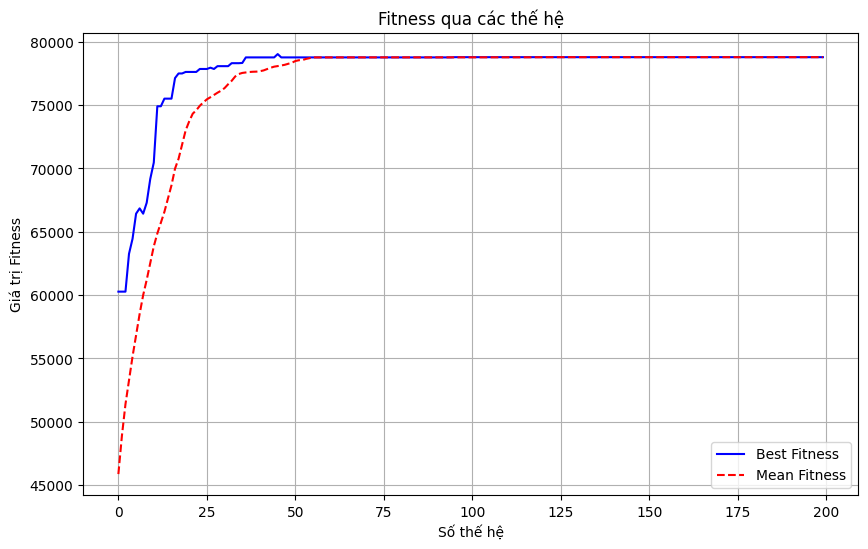

In [10]:
# Hiển thị biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(GENERATIONS), best_fitness_history, label='Best Fitness', color='blue')
plt.plot(range(GENERATIONS), mean_fitness_history, label='Mean Fitness', color='red', linestyle='--')

plt.title('Fitness qua các thế hệ')
plt.xlabel('Số thế hệ')
plt.ylabel('Giá trị Fitness')
plt.legend()
plt.grid(True)
plt.show()

**Điểm cần cải thiện:**

**Hội tụ sớm:** Biểu đồ cho thấy thuật toán hội tụ khá sớm (khoảng 50-70% thế hệ). Điều này có thể do các tham số của thuật toán (như CROSSOVER_RATE và MUTATION_RATE) chưa được tối ưu. Bạn có thể thử nghiệm với các giá trị khác nhau để xem liệu có thể cải thiện được hiệu suất của thuật toán hay không.

**Khoảng cách giữa Best Fitness và Mean Fitness:** Trong giai đoạn hội tụ, khoảng cách giữa Best Fitness và Mean Fitness giảm khá nhanh và gần như bằng 0. Điều này cho thấy sự đa dạng của quần thể bị giảm, có thể dẫn đến việc thuật toán bị mắc kẹt tại một điểm cực trị địa phương (local optima). Bạn có thể thử tăng MUTATION_RATE để duy trì sự đa dạng của quần thể.

**Mean Fitness:** Mean Fitness đạt khoảng 90-95% giá trị Best Fitness trước khi hội tụ là tốt, nhưng trong trường hợp này, Mean Fitness gần như bằng Best Fitness trong giai đoạn hội tụ. Điều này cho thấy quần thể đang bị đồng nhất và có thể không khám phá được không gian giải pháp một cách hiệu quả.

**Không đạt được kết quả tối ưu nhất:** Best Fitness = 78765

**Gợi ý:**

**Thử nghiệm với các tham số khác nhau:** Bạn có thể thử nghiệm với các giá trị khác nhau của CROSSOVER_RATE và MUTATION_RATE để tìm ra bộ tham số tối ưu cho bài toán của bạn.

**Sử dụng các phương pháp selection khác:** Ngoài phương pháp selection hiện tại, bạn có thể thử nghiệm với các phương pháp selection khác như tournament selection hoặc roulette wheel selection.

**Thêm các plot bổ sung:** Bạn có thể thêm các plot bổ sung như biểu đồ phân bố (histogram) của fitness để có cái nhìn toàn diện hơn về performance của thuật toán.

**Ý kiến riêng:**

**Expectation plot** sẽ đảm bảo đa dạng quần thể, cân bằng khai phá khám phá, không bị hội tụ sớm, mắc kẹt ở max fitness (vì yêu cầu của knapsack là tìm giải pháp tối ưu nhất) (kiểu mình train theo mong đợi của mình chứ mấy cái này ko có đáp án cụ thể phải như nào)

**Về việc dùng std** để đánh giá perfomance thì tao thấy k sure vì tao chỉ biết 1 case dùng mấy chỉ số thống kê đó ngta dùng để đánh giá mối quan hệ của data kiểu ngta dùng std để đánh giá 2 trường dữ liệu xem nó có liên quan nhau không để người ta làm mấy cái mô hình dự đoán nếu nó xấp xỉ bằng 0 thì liên quan kiểu z nên tao làm theo recommend của gemini cũng như một góc nhìn khác về thuật toán